<div style="border-radius:10px;
            border : black solid;
            background-color: ##FFFFFF;
            font-size:180%;
            text-align: left">

<h1 style='; border:0; border-radius: 10px; text-shadow: 1px 1px black; font-weight: bold; color:#AB8111'><center> GOLD PRICE PREDICTION </center></h1>

<div style="border:1px solid blue; border-radius:10px; padding:2px">
    <img src="https://www.kitco.com/news/2022-08-22/images/shutterstock_1797061261-1.jpg" width="100%">
</div>
<div style="padding:4px">

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#AB8111;font-family:sans-serif;color:#FFF9ED;font-size:200%;text-align:center;border-radius:9px 9px;">TABLE OF CONTENTS</p>   
    
* [1. INTRODUCTION](#1)
    
* [2. IMPORTING NECESSARY LIBRARIES](#2)
    
* [3. LOADING DATASET](#3)
    
* [4. INITIAL INFORMATION ABOUT DATASET](#4)
    
    * [4.1. Basic Information About Dataset](#4.1)    
    * [4.2. Descriptive Statistics of Dataset](#4.2)    
    * [4.3. Change Column Names](#4.3)    
    * [4.4. Other Basic Information about Dataset](#4.4)
    * [4.5. Correlation between Variables of Dataset](#4.5)
    
    
* [5. DATA VISUALIZATION](#5)
    
    * [5.1. Heatmap](#5.1)    
    * [5.2. Pairplot](#5.2)    
    * [5.3. Distplot](#5.3)    
    * [5.4. Lineplot](#5.4)
    * [5.5. Jointplot](#5.5)
    * [5.6. Plotting 'open' and 'close' price history](#5.6)
    * [5.7. Histogram with Plotly Express](#5.7)
    
    
    
* [6. DATASET PREPROCESSİNG](#6)
    
    * [6.1. New Dataframe with only 'close' Column](#6.1)    
    * [6.2. Converting New Dataframe to Array](#6.2)    
    * [6.3. The number of Rows to train the Model on](#6.3)    
    * [6.4. Normalization](#6.4)
    * [6.5. Creating Training dataset](#6.5)
    * [6.6. Convert x_train and y_train to array](#6.6)
    * [6.7. Reshaping the data](#6.7)
   
    
* [7. LONG SHORT-TERM MEMORY (LSTM) Model](#7)
    
    * [7.1. Building and Training LSTM model](#7.1)    
    * [7.2. Create testing dataset](#7.2)    
    * [7.3. Convert test data to array and reshape it](#7.3)    
    * [7.4. Get predicted prices](#7.4)
    * [7.5. Get root mean squared error (RMSE)](#7.5)
    * [7.6. Plot the data](#7.6)
    * [7.7. Show the valid and predicted prices](#7.7)

<a id="1"></a>

## <b>1 <span style='color:#AB8111'>|</span> INTRODUCTION</b>

<div style="border-radius:1px;
            border : #FDFF81;
            background-color: #FDFF81;
            font-size:120%;
            text-align: left">
    
<h3 style='; border:0; border-radius: 15px; color:black'><center>Some information about gold:</center></h3> 

<b>REFERENCE: 🔗</b> https://en.wikipedia.org/wiki/Gold
        
Gold is a chemical element with the symbol Au (from Latin: aurum) and atomic number 79. This makes it one of the higher atomic number elements that occur naturally. It is a bright, slightly orange-yellow, dense, soft, malleable, and ductile metal in a pure form. Chemically, gold is a transition metal and a group 11 element. It is one of the least reactive chemical elements and is solid under standard conditions. Gold often occurs in free elemental form, as nuggets or grains, in rocks, veins, and alluvial deposits. It occurs in a solid solution series with the native element silver, naturally alloyed with other metals like copper and palladium, and mineral inclusions such as within pyrite. Less commonly, it occurs in minerals as gold compounds, often with tellurium.
_________________________________________________________________________
Gold is resistant to most acids, though it does dissolve in aqua regia (a mixture of nitric acid and hydrochloric acid), forming a soluble tetrachloroaurate anion. Gold is insoluble in nitric acid alone, which dissolves silver and base metals, a property long used to refine gold and confirm the presence of gold in metallic substances, giving rise to the term 'acid test'. Gold dissolves in alkaline solutions of cyanide, which are used in mining and electroplating. Gold also dissolves in mercury, forming amalgam alloys, and as the gold acts simply as a solute, this is not a chemical reaction. A relatively rare element, gold is a precious metal that has been used for coinage, jewelry, and other arts throughout recorded history. In the past, a gold standard was often implemented as a monetary policy. Gold coins ceased to be minted as a circulating currency in the 1930s, and the world gold standard was abandoned for a fiat currency system after the Nixon shock measures of 1971.
_________________________________________________________________________
In 2020, the world's largest gold producer was China, followed by Russia and Australia. A total of around 201,296 tonnes of gold exists above ground, as of 2020. This is equal to a cube with each side measuring roughly 21.7 meters. The world consumption of new gold produced is about 50% in jewelry, 40% in investments and 10% in industry. Gold's high malleability, ductility, resistance to corrosion and most other chemical reactions, and conductivity of electricity have led to its continued use in corrosion-resistant electrical connectors in all types of computerized devices. Gold is also used in infrared shielding, production of colored glass, gold leafing, and tooth restoration. Certain gold salts are still used as anti-inflammatories in medicine.

#### <b><mark>REFERENCE: 🔗</mark></b> https://en.wikipedia.org/wiki/Gold

<a id="2"></a>

## <b>2 <span style='color:#AB8111'>|</span> IMPORT NECESSARY LIBRARIES</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import figure_factory as figfac
from termcolor import colored

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error
#!pip install keras-tuner --upgrade
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Required libraries were succesfully imported...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from ipykernel import kernelapp as app


<a id="3"></a>

## <b>3 <span style='color:#AB8111'>|</span> LOAD DATASET</b>

In [2]:
df = pd.read_csv("../input/daily-gold-price-historical-data/gold.csv")
fig = figfac.create_table(df.head(n = 10))
fig.show()

<a id="4"></a>

## <b>4 <span style='color:#AB8111'>|</span> INITIAL INFORMATION ABOUT DATASET</b>

<a id="4.1"></a>

#### <b>4.1 <span style='color:#AB8111'>|</span> Basic information about dataset</b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   int64  
 6   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


<div style="border-radius:1px;
            border : #FDFF81;
            background-color: #FDFF81;
            font-size:120%;
            text-align: left">
    
<h3 style='; border:0; border-radius: 15px; color:black'><center></center></h3> 

#### Some observations:    
    
* This dataset consists of 5203 rows and 7 columns.
    
* 2 of the variables in the dataset are categorical, 1 is integer, and 4 are of float data type.
    
* Memory usage is 312 kilobytes.     


<a id="4.2"></a>

#### <b>4.2 <span style='color:#AB8111'>|</span> Descriptive statistics of dataset</b>

In [4]:
df.describe().T.style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
Open,5703.000000,1040.382816,518.733377,256.600000,459.850000,1188.800000,1381.400000,2076.400000
High,5703.000000,1048.339181,522.353946,259.400000,463.900000,1198.000000,1392.750000,2089.200000
Low,5703.000000,1031.863169,514.455903,255.100000,457.450000,1179.700000,1368.100000,2049.000000
Close,5703.000000,1040.298282,518.524020,256.600000,460.500000,1188.700000,1383.050000,2069.400000
Volume,5703.000000,139141.669297,102537.449058,0.000000,52938.500000,126006.000000,193109.000000,816531.000000


<div style="border-radius:1px;
            background-color: #FDFF81;
            font-size:120%;
            text-align: left">
    
<h3 style='; border:0; border-radius: 15px; color:black'><center></center></h3> 

#### Some observations:    
    
* As it can be seen there is huge standard deviation comparison with average prices

<a id="4.3"></a>

#### <b>4.3 <span style='color:#AB8111'>|</span> Change column names</b>

In [5]:
df.rename(columns = {"Date" : "date", "Open" : "open", "High" : "high", "Low" : "low",
                     "Close" : "close", "Volume" : "volume", "Currency" : "currency"}, inplace = True)

print(colored("Column names were succesfully changed...", color = "green", attrs = ["bold", "dark"]))

Column names were succesfully changed...


<a id="4.4"></a>

#### <b>4.4 <span style='color:#AB8111'>|</span> Addition information about dataset</b>

In [6]:
print("Shape of the dataset: ", df.shape)
print("Length of the dataset: ", len(df))
print("Maximum closing price of gold during last twenty two years: ", df["close"].max())
print("Minimum closing price of gold during last twenty two years: ", df["close"].min())

Shape of the dataset:  (5703, 7)
Length of the dataset:  5703
Maximum closing price of gold during last twenty two years:  2069.4
Minimum closing price of gold during last twenty two years:  256.6


<a id="4.5"></a>

#### <b>4.5 <span style='color:#AB8111'>|</span> Correlation between variables of dataset</b>

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap = "copper")

,open,high,low,close,volume
open,1.000000,0.999879,0.999825,0.999740,0.692123
high,0.999879,1.000000,0.999778,0.999861,0.693861
low,0.999825,0.999778,1.000000,0.999893,0.688983
close,0.999740,0.999861,0.999893,1.000000,0.690534
volume,0.692123,0.693861,0.688983,0.690534,1.000000


<a id="5"></a>

## <b>5<span style='color:#AB8111'>|</span> DATA VISUALIZATION</b>

<a id="5.1"></a>

#### <b>5.1<span style='color:#AB8111'>|</span> Heatmap</b>

<div style="border-radius:1px;
            background-color: #FDFF81;
            font-size:120%;
            text-align: left">
    
<h3 style='; border:0; border-radius: 15px; color:black'><center></center></h3> 

#### What is the heatmap?    
    
A heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space. There are two fundamentally different categories of heat maps: the cluster heat map and the spatial heat map. In a cluster heat map, magnitudes are laid out into a matrix of fixed cell size whose rows and columns are discrete phenomena and categories, and the sorting of rows and columns is intentional and somewhat arbitrary, with the goal of suggesting clusters or portraying them as discovered via statistical analysis. The size of the cell is arbitrary but large enough to be clearly visible. By contrast, the position of a magnitude in a spatial heat map is forced by the location of the magnitude in that space, and there is no notion of cells; the phenomenon is considered to vary continuously.

#### <span style='background:#FDFF81;color:#000000;'>Reference:</span> https://en.wikipedia.org/wiki/Heat_map

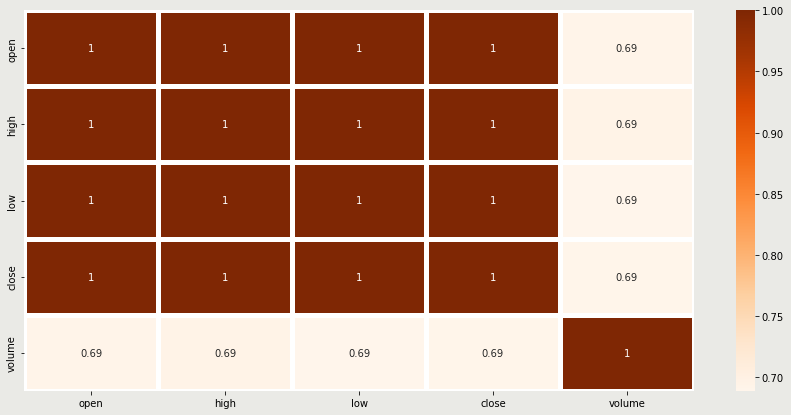

In [8]:
plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "white", cmap = "Oranges");

<a id="5.2"></a>

#### <b>5.2<span style='color:#AB8111'>|</span> Pairplot</b>

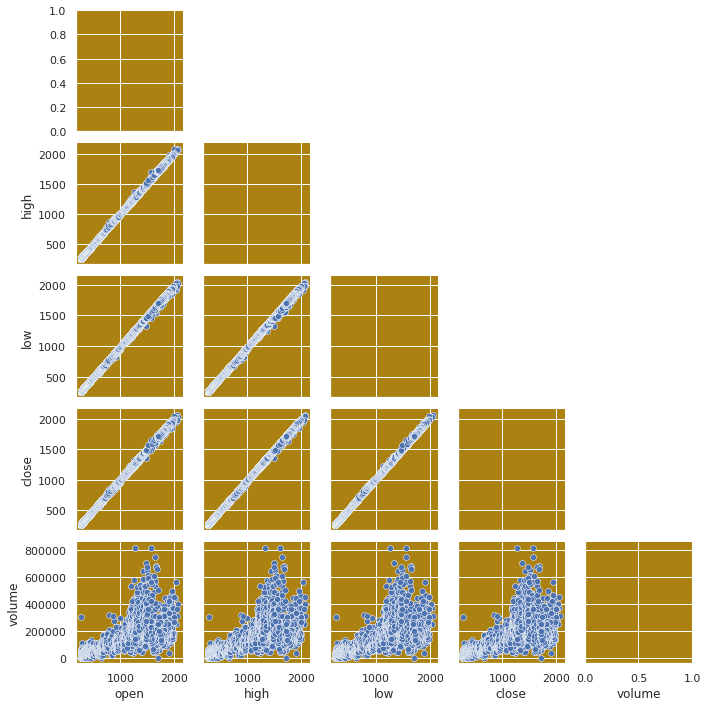

In [9]:
sns.set(rc={"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})
sns.pairplot(df, diag_kind = "reg", height = 2, aspect = 1, corner = True);

<div style="border-radius:1px;
            background-color: #FDFF81;
            font-size:120%;
            text-align: left">
    
<h3 style='; border:0; border-radius: 15px; color:black'><center></center></h3> 

#### Some observations:    
    
* From the above graph and heat map, we can clearly observe that there is a very high correlation between the variables

<a id="5.3"></a>

#### <b>5.3<span style='color:#AB8111'>|</span> Distplot</b>

<div style="border-radius:1px;
            background-color: #FDFF81;
            font-size:120%;
            text-align: left">
    
<h3 style='; border:0; border-radius: 15px; color:black'><center></center></h3> 

The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

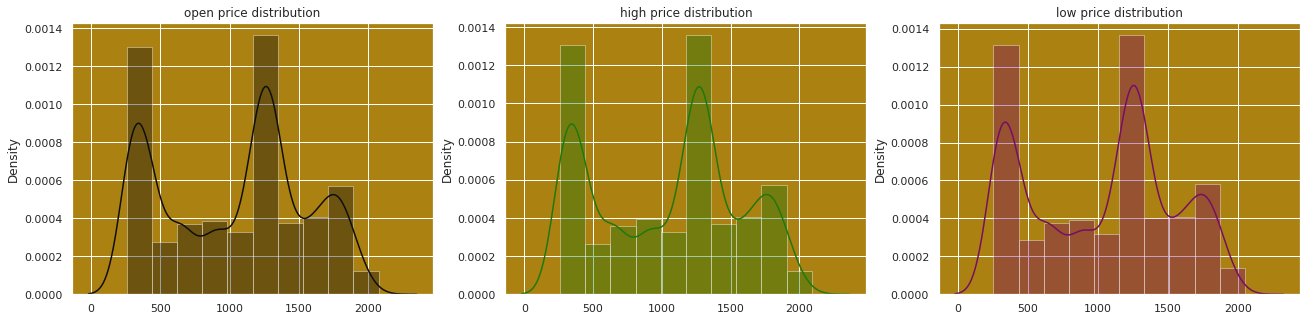

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (22, 5))

sns.distplot(ax = axes[0], x = df["open"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0E0E0D").set(title = "open price distribution");

sns.distplot(ax = axes[1], x = df["high"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#1F780D").set(title = "high price distribution");

sns.distplot(ax = axes[2], x = df["low"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#780D62").set(title = "low price distribution");


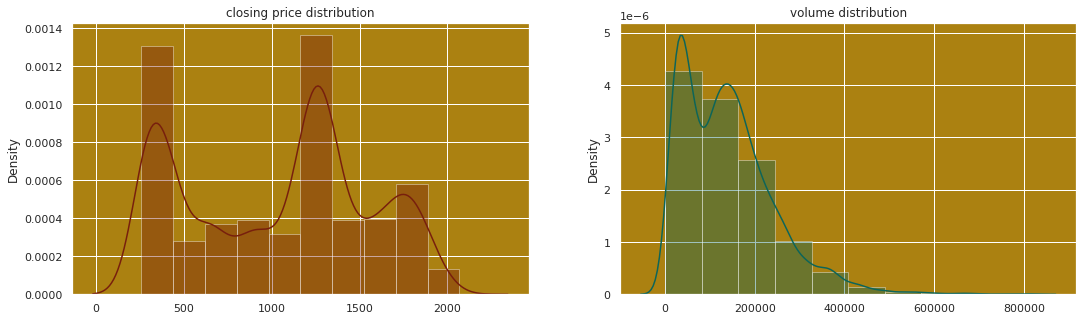

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (18, 5))

sns.distplot(ax = axes[0], x = df["close"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#781F0D").set(title = "closing price distribution");

sns.distplot(ax = axes[1], x = df["volume"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0D6559").set(title = "volume distribution");

<a id="5.4"></a>

#### <b>5.4<span style='color:#AB8111'>|</span> Lineplot</b>

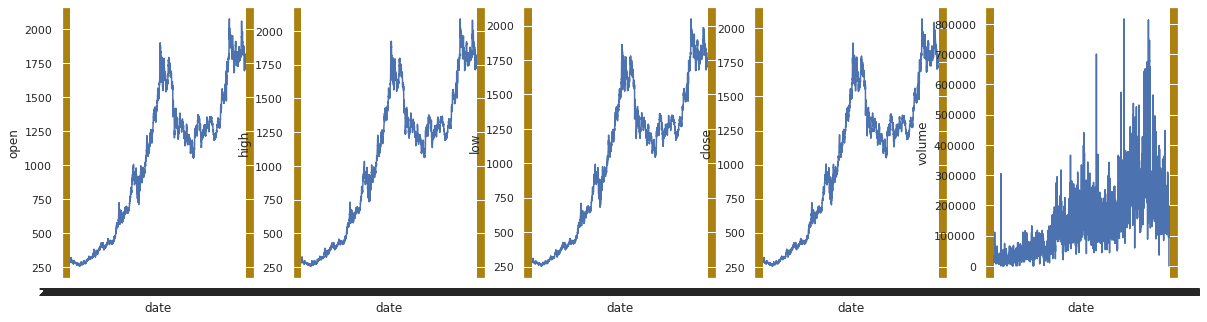

In [12]:
sns.set(rc = {"axes.facecolor":"#AB8111", "figure.facecolor":"#ffffff"})

fig, axes = plt.subplots(1, 5, figsize = (20, 5))
axes = axes.flatten()

sns.lineplot(ax = axes[0], x = df["date"], y = df["open"]);
sns.lineplot(ax = axes[1], x = df["date"], y = df["high"]);
sns.lineplot(ax = axes[2], x = df["date"], y = df["low"]);
sns.lineplot(ax = axes[3], x = df["date"], y = df["close"]);
sns.lineplot(ax = axes[4], x = df["date"], y = df["volume"]);

<a id="5.5"></a>

#### <b>5.5<span style='color:#AB8111'>|</span> Jointplot</b>

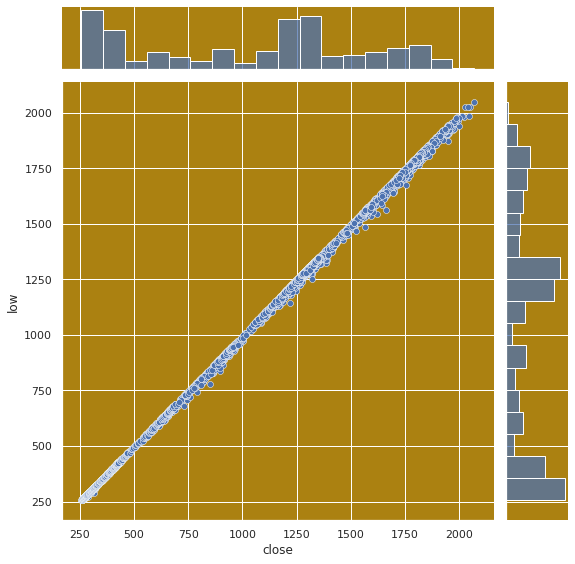

In [13]:
sns.jointplot(x = "close", y = "low", data = df, height = 8, ratio = 6, kind = "scatter");

<a id="5.6"></a>

#### <b>5.6<span style='color:#AB8111'>|</span> Plotting 'close' and 'open' price history</b>

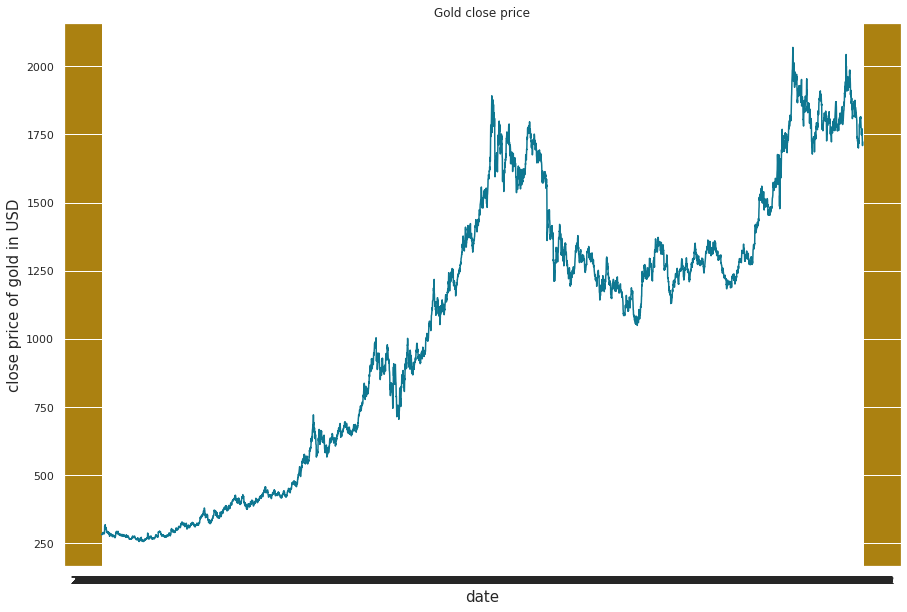

In [14]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["date"], df["close"], color = "#0E7791")
plt.title("Gold close price")
plt.xlabel("date", fontsize = 15)
plt.ylabel("close price of gold in USD", fontsize = 15)
plt.show()

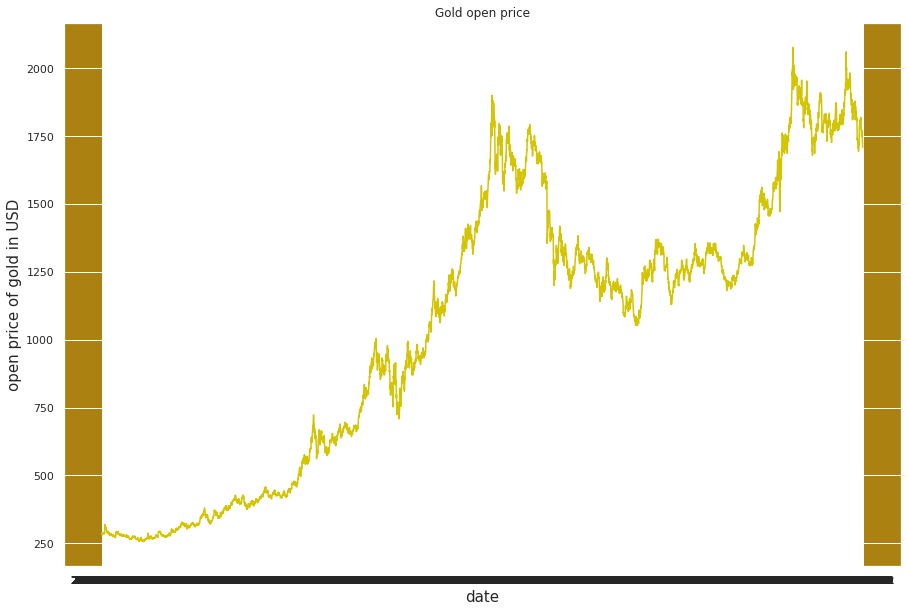

In [15]:
fig = plt.figure(figsize = (15, 10))

plt.plot(df["date"], df["open"], color = "#D3C404")
plt.title("Gold open price")
plt.xlabel("date", fontsize = 15)
plt.ylabel("open price of gold in USD", fontsize = 15)
plt.show()

<a id="5.7"></a>

#### <b>5.7<span style='color:#AB8111'>|</span> Histogram with plotly express</b>

In [16]:
fig = px.histogram(df, x = "close", y = "volume", marginal = "box", text_auto = True, template = "plotly_dark", hover_data  = df.columns)
fig.show()

<a id="6"></a>

## <b>6<span style='color:#AB8111'>|</span> DATA PREPROCESSING</b>

<a id="6.1"></a>

#### <b>6.1<span style='color:#AB8111'>|</span> New dataframe with 'close' column</b>

In [17]:
data = df.filter(['close'])
data.head().style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                    "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,close
0,283.700000
1,282.100000
2,282.400000
3,282.900000
4,282.700000


<a id="6.2"></a>

#### <b>6.2<span style='color:#AB8111'>|</span> Converting new dataframe to array</b>

In [18]:
dataset = data.values
dataset[0:5]

array([[283.7],
       [282.1],
       [282.4],
       [282.9],
       [282.7]])

<a id="6.3"></a>

#### <b>6.3<span style='color:#AB8111'>|</span> The number of rows to train the model on</b>

In [19]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
print("Training data length: ", training_data_len)

Training data length:  5418


<a id="6.4"></a>

#### <b>6.4<span style='color:#AB8111'>|</span> Normalization</b>

<div style="border-radius:1px;
            background-color: #FDFF81;
            font-size:120%;
            text-align: left">
    
<h3 style='; border:0; border-radius: 15px; color:black'><center></center></h3> 

#### What is MinMaxScaler?    
    
MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution. MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. Note that MinMaxScaler doesn't reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

In [20]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01494925],
       [0.01406664],
       [0.01423213],
       ...,
       [0.81067961],
       [0.80135702],
       [0.80891439]])

<a id="6.5"></a>

#### <b>6.5<span style='color:#AB8111'>|</span> Creating training dataset</b>

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train, "\n")
        print(y_train)

[array([0.01494925, 0.01406664, 0.01423213, 0.01450794, 0.01439762,
       0.01533539, 0.01494925, 0.01572154, 0.01561121, 0.01820388,
       0.01859003, 0.01803839, 0.01825905, 0.01737643, 0.01654898,
       0.01649382, 0.0168248 , 0.01621801, 0.01632833, 0.01588703,
       0.01715578, 0.01836937, 0.03111209, 0.02642321, 0.02487864,
       0.02868491, 0.0342564 , 0.03144307, 0.03000883, 0.02620256,
       0.02669903, 0.02603707, 0.02796778, 0.02818844, 0.02526478,
       0.02443733, 0.02096205, 0.02074139, 0.02074139, 0.02024492,
       0.01825905, 0.01859003, 0.01809356, 0.02046558, 0.01864519,
       0.01991395, 0.01842454, 0.01925199, 0.01825905, 0.01820388,
       0.01676964, 0.01566637, 0.01649382, 0.01864519, 0.01748676,
       0.01588703, 0.01572154, 0.01318402, 0.01263239, 0.01064651])] 

[0.012411738746690215]
[array([0.01494925, 0.01406664, 0.01423213, 0.01450794, 0.01439762,
       0.01533539, 0.01494925, 0.01572154, 0.01561121, 0.01820388,
       0.01859003, 0.01803839, 0.

<a id="6.6"></a>

#### <b>6.6<span style='color:#AB8111'>|</span> Convert x_train and y_train to array</b>

In [22]:
x_train = np.array(x_train)
y_train = np.array(y_train)

<a id="6.7"></a>

#### <b>6.7<span style='color:#AB8111'>|</span> Reshaping the data</b>

In [23]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("The sape of x_train set:", x_train.shape)

The sape of x_train set: (5358, 60, 1)


<a id="7"></a>

## <b>7<span style='color:#AB8111'>|</span> LONG SHORT-TERM MEMORY (LSTM) Model</b>

<a id="7.1"></a>

#### <b>7.1<span style='color:#AB8111'>|</span> Building and training LSTM model</b>

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2022-12-01 14:44:58.511263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 14:44:58.514414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 14:44:58.515117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 14:44:58.516069: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

5358/5358 [==============================] - 34s 6ms/step - loss: 5.7398e-04


<a id="7.2"></a>

#### <b>7.2<span style='color:#AB8111'>|</span> Create testing dataset</b>

In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

<a id="7.3"></a>

#### <b>7.3<span style='color:#AB8111'>|</span> Convert test data to array and reshape it</b>

In [26]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

<a id="7.4"></a>

#### <b>7.4<span style='color:#AB8111'>|</span> Get predicted prices</b>

In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions[0:10]

array([[1775.2266],
       [1772.3136],
       [1767.8931],
       [1767.6296],
       [1766.8391],
       [1765.4539],
       [1765.4197],
       [1765.7999],
       [1787.0837],
       [1789.0782]], dtype=float32)

<a id="7.5"></a>

#### <b>7.5<span style='color:#AB8111'>|</span> Get root mean squared error (RMSE)</b>

In [28]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE score of the model:", rmse)

RMSE score of the model: 39.42306093881927


<a id="7.6"></a>

#### <b>7.6<span style='color:#AB8111'>|</span> Plot the data</b>

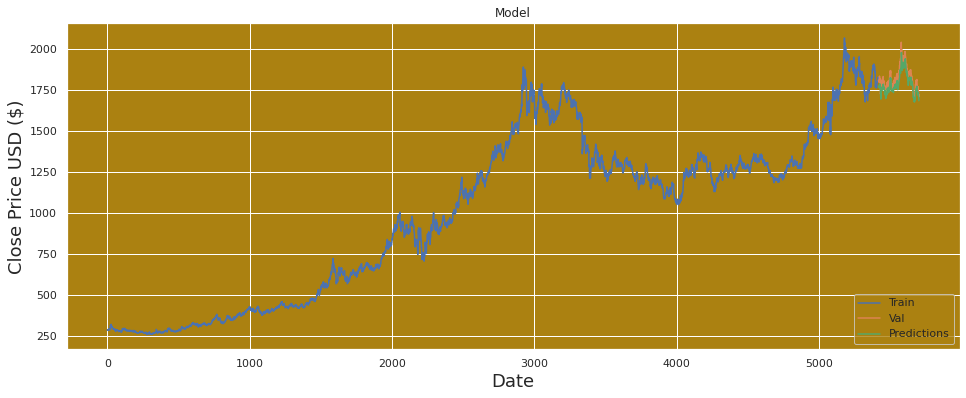

In [29]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

<a id="7.7"></a>

#### <b>7.7<span style='color:#AB8111'>|</span> Show the valid and predicted prices</b>

In [30]:
valid.head(n = 10)

,close,Predictions
5418,1811.4,1775.226562
5419,1803.4,1772.313599
5420,1805.4,1767.893066
5421,1801.8,1767.629639
5422,1799.2,1766.839111
5423,1799.8,1765.453857
5424,1799.7,1765.419678
5425,1835.8,1765.799927
5426,1817.2,1787.083740
5427,1822.2,1789.078247


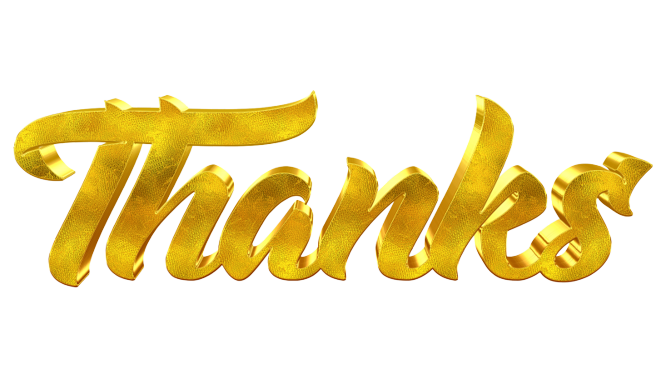